# <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.The model aims to assist bike-sharing companies in optimizing bike availability, resource allocation, and service planning to meet customer demand effectively and enhance overall operational efficiency, minimize inventory shortages or excesses, and ultimately maximize the utilization of bike-sharing systems.


###**SOURCE OF DATA**
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information(December 2017 to November2018).</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing libraries

In [ ]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")


# Data Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/project/ml bike/SeoulBikeData.csv'
bike_data = pd.read_csv(file_path, encoding= 'unicode_escape')

# Exploratory Data Analysis

## Taking a quick look at our Data

In [ ]:
bike_data.head()

In [ ]:
bike_data.tail()

In [ ]:
# Data description
bike_data.describe().style.background_gradient()

In [ ]:
#reading no of row and column
bike_data.shape

In [ ]:
# all the column or feature
bike_data.columns

In [ ]:
bike_data=bike_data.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall',
                                    'Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

# Finding datatypes of features in our dataset

In [ ]:
#To find out categorical and numerical features in our dataset
bike_data.dtypes

**There are 14 columns. 10 are numerical and 4 are categorical columns. 'date' column has multiple information, extracting those informations can be insightful.**

In [ ]:
bike_data['Seasons']=bike_data['Seasons'].astype('category')
bike_data['Holiday'] = bike_data['Holiday'].astype('category')
bike_data['Functioning Day'] = bike_data['Functioning Day'].astype('category')

In [ ]:
# convert Hour column integer to Object
bike_data['Hour']=bike_data['Hour'].astype('object')
bike_data.info()

In [ ]:
bike_data['Seasons'].value_counts()

In [ ]:
bike_data['Holiday'].value_counts()

In [ ]:
bike_data['Functioning Day'].value_counts()

# checking for missing values

In [ ]:
#data information for null value
bike_data.isna().sum()

#checking for duplicate values

In [ ]:
bike_data.duplicated().sum()

**There are no missing values and duplicate values in dataset**

# Extracting features from date

In [ ]:
# split day of week, month and year in three column
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')
bike_data['day_of_week'] = bike_data['Date'].dt.day_name() # extract week name from Date column
bike_data['Week_day'] = bike_data['day_of_week'].apply(lambda x:'Weekend' if x=='Saturday' or x =='Sunday' else 'Weekdays')
bike_data["Month"] = bike_data['Date'].dt.month_name()  # extract month name from Date column
bike_data.drop(columns='day_of_week',inplace=True)
bike_data.head()

In [ ]:
# drop the Date column
bike_data.drop(columns=['Date'],inplace=True)

In [ ]:
# Divide Data in categorical and numerical features
numeric_features= bike_data.select_dtypes(exclude=['object','category'])
categorical_features=bike_data.select_dtypes(include=['object','category'])


# Univariate Analysis

 Checking for Outliers





In [ ]:

# checking Outliers with Boxplot
n = 1
plt.figure(figsize=(20,10))

for i in numeric_features.columns:
    plt.subplot(4,4,n)
    plt.rcParams['axes.facecolor'] = 'black'
    n=n+1
    sns.boxplot(bike_data[i],orient='h',color='red')
    plt.title(i)
    plt.tight_layout()


# Skewness Distribution

In [ ]:
n = 1
plt.figure(figsize=(20,15))
plt.rcParams['axes.facecolor'] = 'white'
for i in numeric_features.columns:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(bike_data[i],color='blue')
  plt.title(i)
  plt.tight_layout()

> Distribution of data of each variable clearly shows some are right skewed and some are left skewed




>Right skewed columns are:
Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

>Left skewed columns are:
Visibility (10m), Dew point temperature(°C)



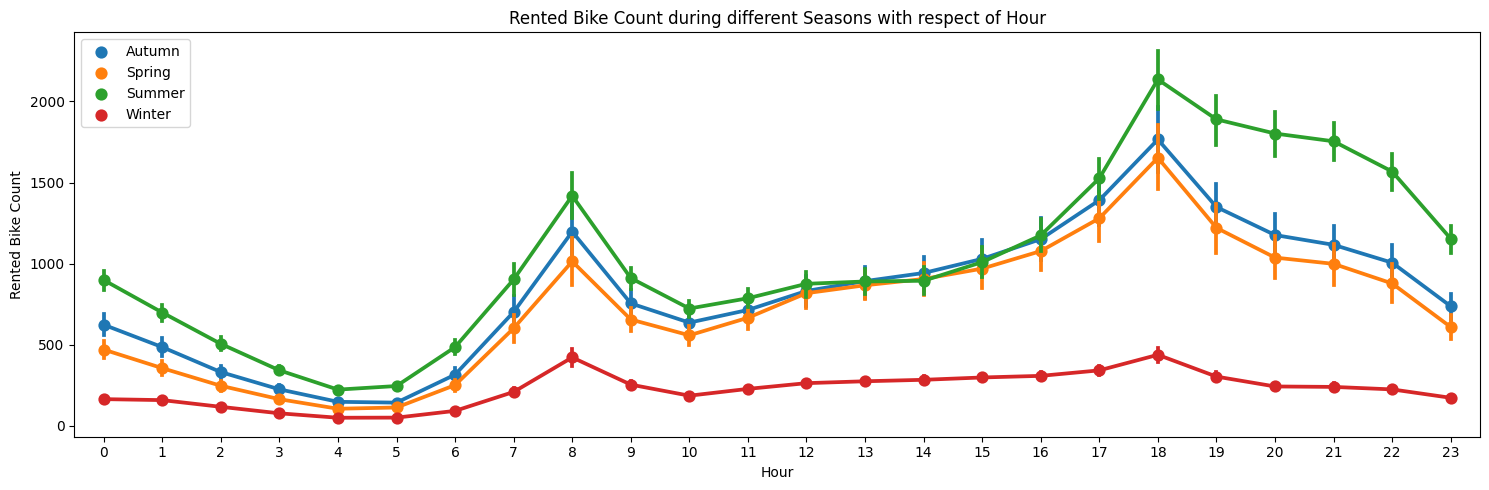

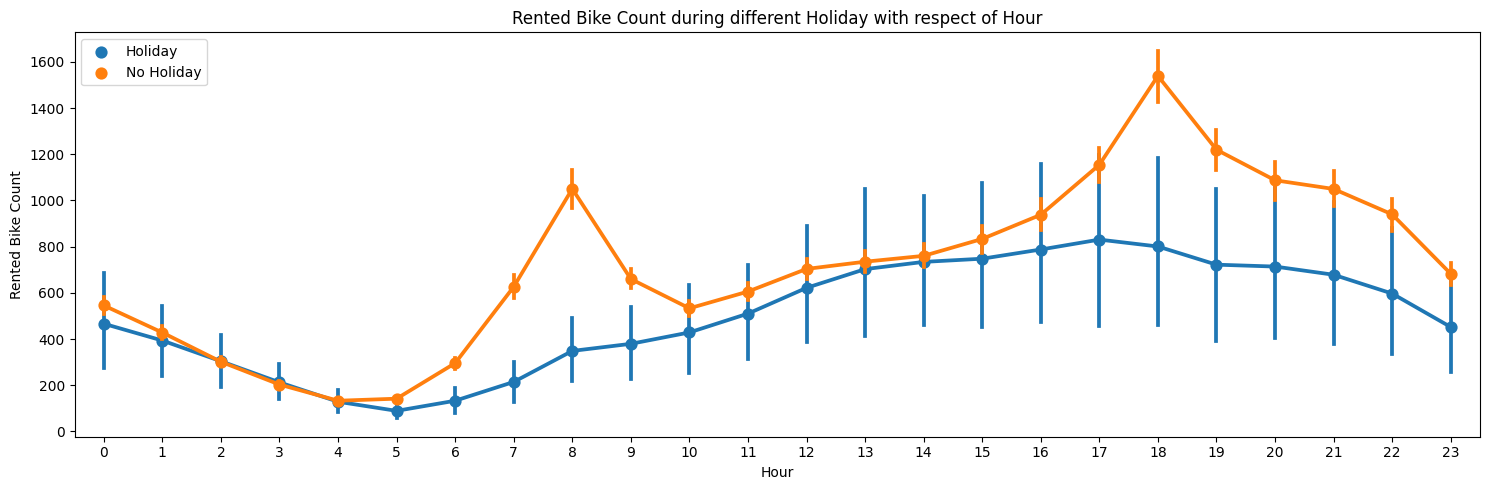

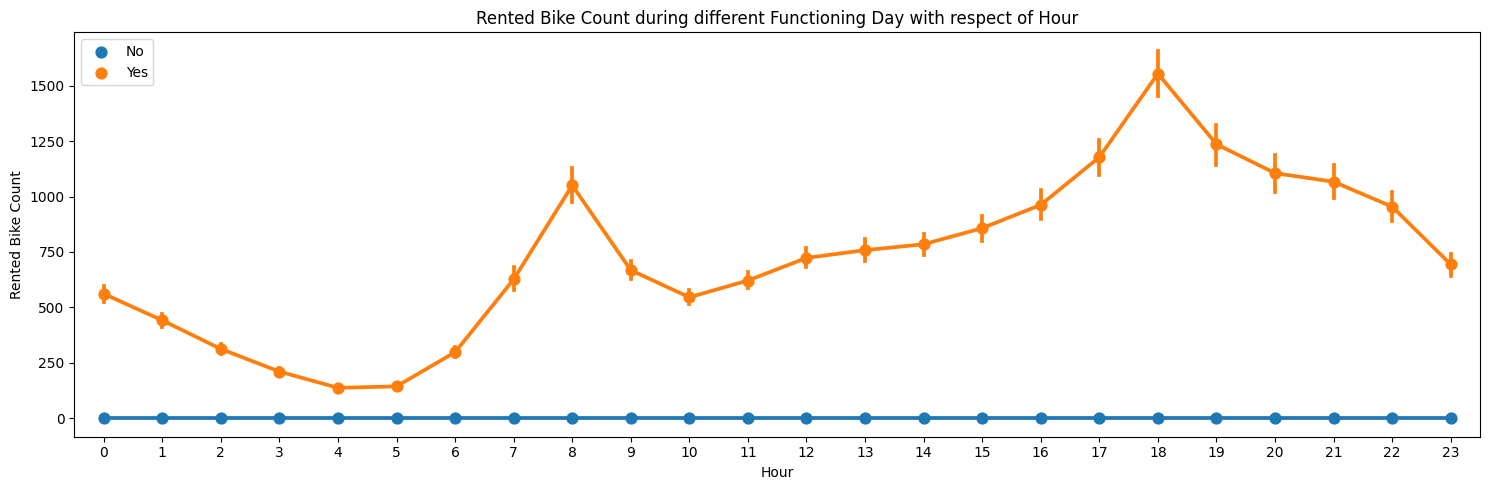

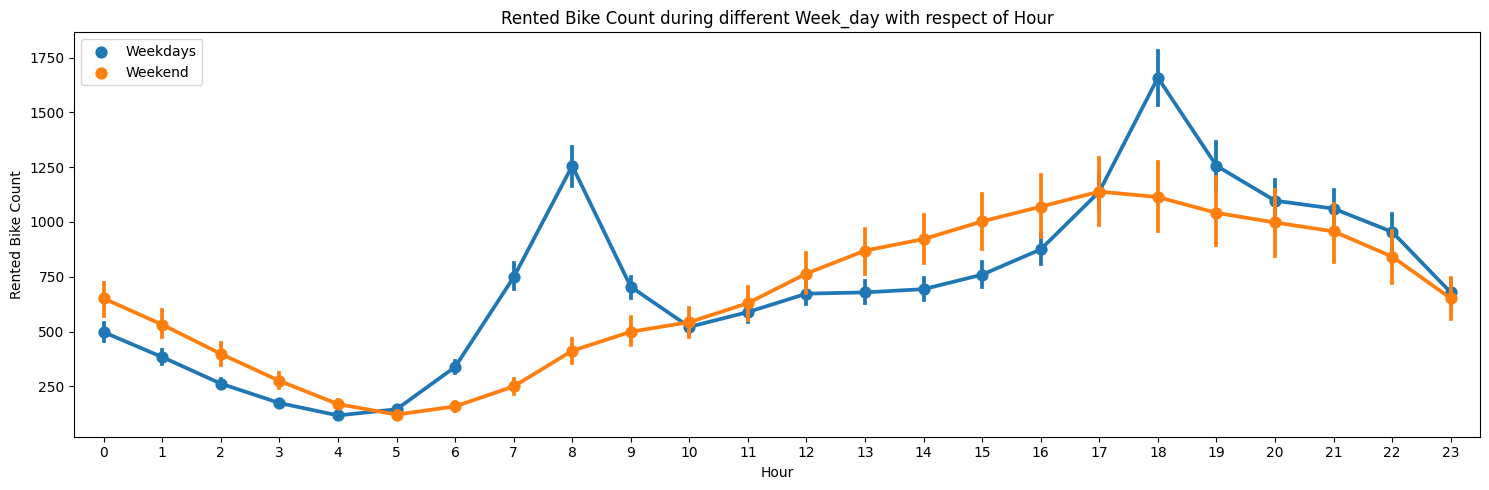

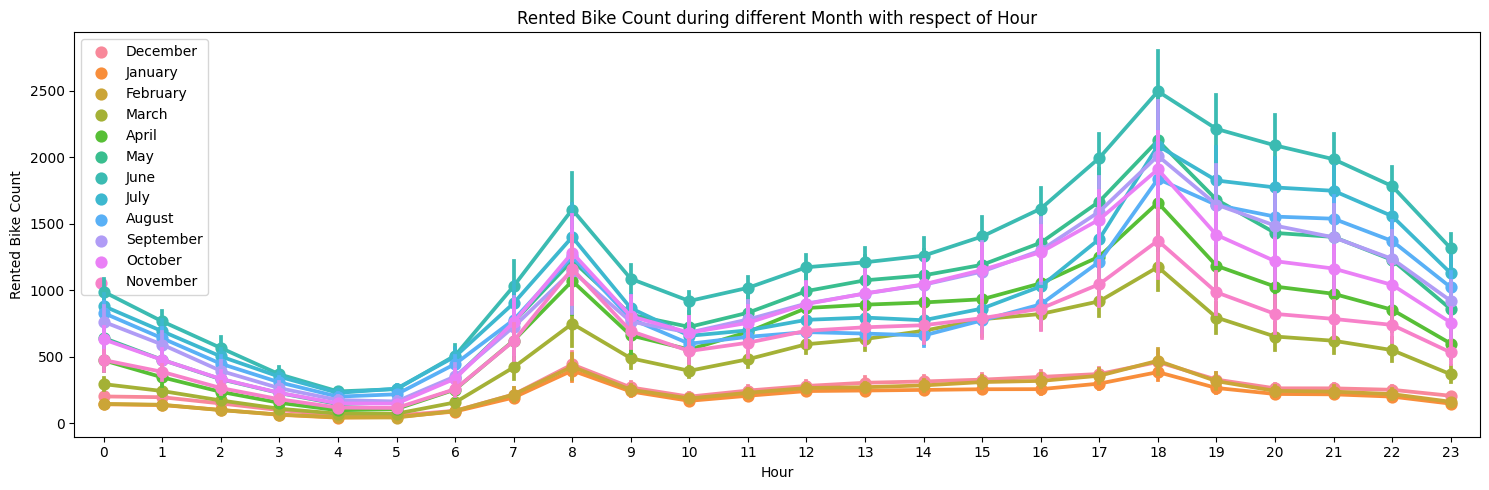

In [25]:
# we create point plots with Rented Bike Count with different categorical features at different Hour

for i in categorical_features.columns[1:]:
    plt.figure(figsize=(15,5))
    sns.pointplot(x=bike_data["Hour"],y=bike_data['Rented Bike Count'],hue=bike_data[i])
    plt.rcParams['axes.facecolor'] = 'white'
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Plot between Hour and Rented bike count')

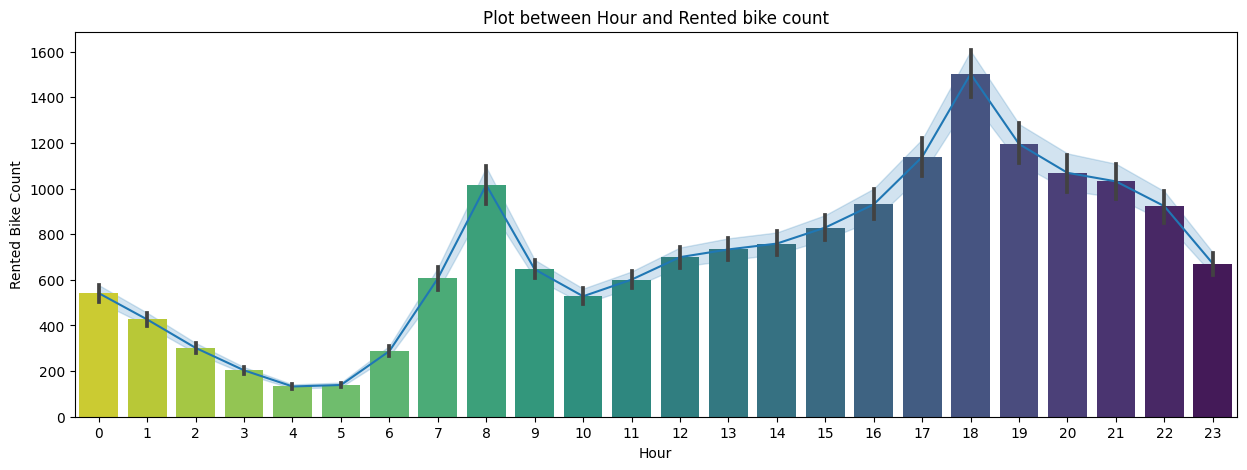

In [26]:
# bar plot between hr and rented bike count
plt.figure(figsize=(15,5))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented Bike Count'])
plt.rcParams['axes.facecolor'] = 'black'
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented Bike Count'], palette='viridis_r')
sns.set(style="ticks")
plt.title("Plot between Hour and Rented bike count")

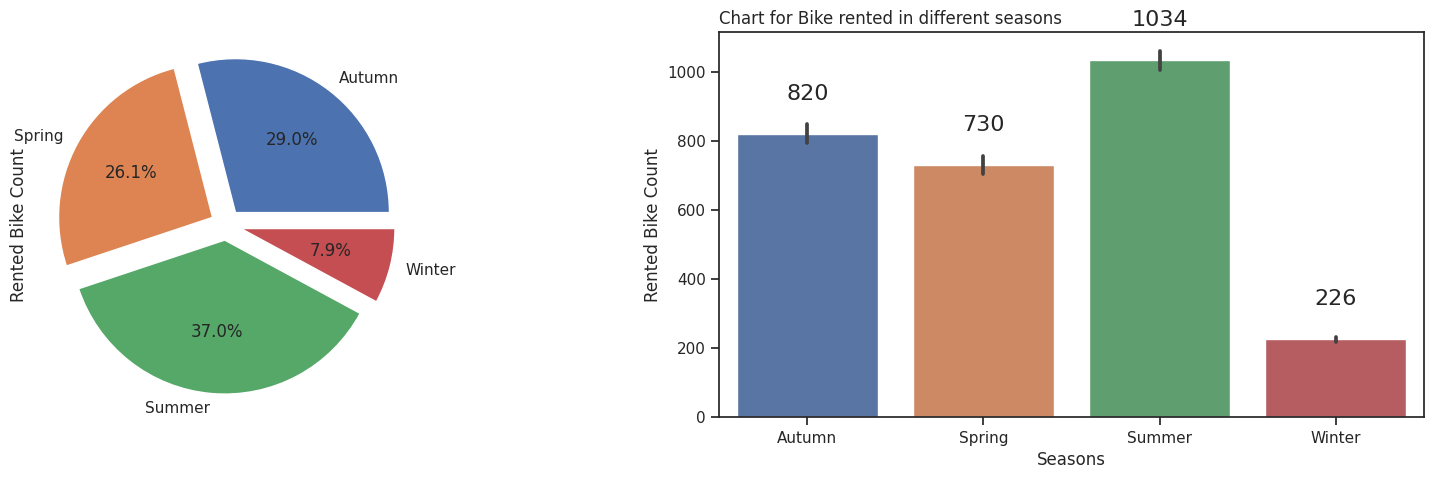

In [27]:
fig, axes = plt.subplots(ncols=2,figsize=(20,5))

# Plotting the bike rented per seasons using bar chart
ax = sns.barplot(x ="Seasons", y ="Rented Bike Count",data=bike_data)

# Plotting the bike rented per seasons using pie chart.
bike_data.groupby("Seasons")['Rented Bike Count'].sum().plot(kind='pie',ax = axes[0],autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1))
plt.title("Chart for Bike rented in different seasons",loc="left")

# Annotating the barplot.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.0f}'.format(height),ha = "center", fontsize= 16)

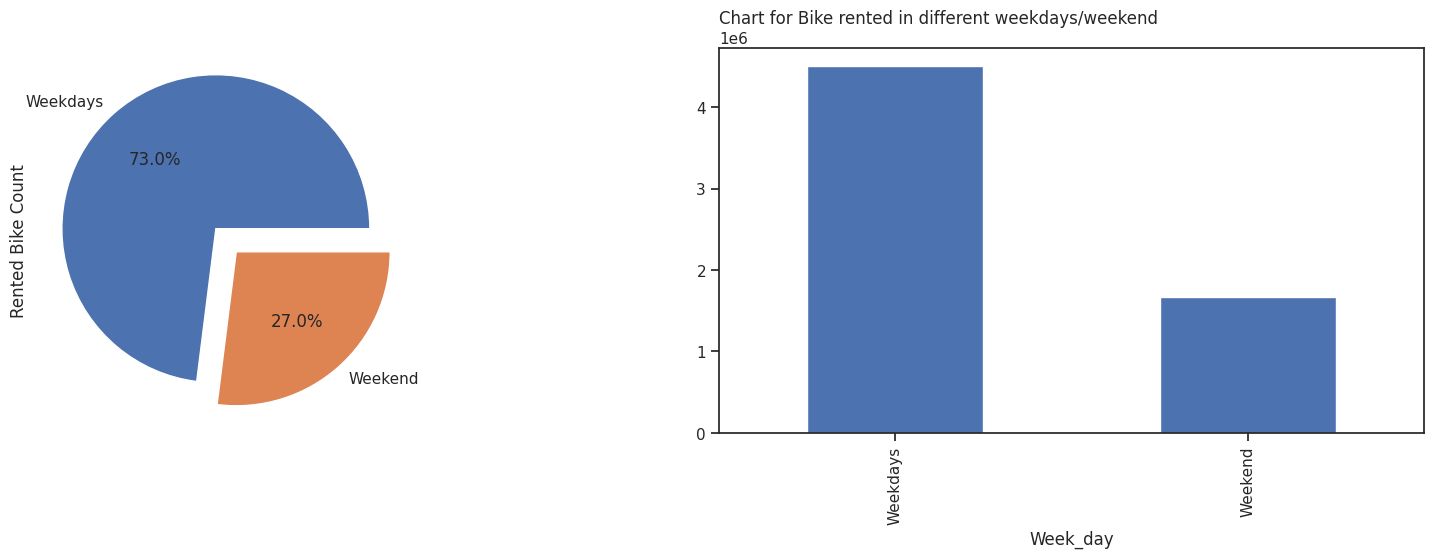

In [28]:
fig, axes = plt.subplots(ncols=2,figsize=(20,5))

# Plotting the bike rented per seasons using bar chart
bike_data.groupby("Week_day")['Rented Bike Count'].sum().plot(kind='bar')
plt.title("Chart for Bike rented in different weekdays/weekend",loc="left")

# Plotting the bike rented per seasons using pie chart.
bike_data.groupby("Week_day")['Rented Bike Count'].sum().plot(kind='pie',ax = axes[0],autopct='%1.1f%%',explode=(0.1,0.1))
plt.title("Chart for Bike rented in different weekdays/weekend",loc="left")

# Annotating the barplot.
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.0f}'.format(height),ha = "center", fontsize= 16)

Text(0.5, 1.0, 'Bike rented in Different Months')

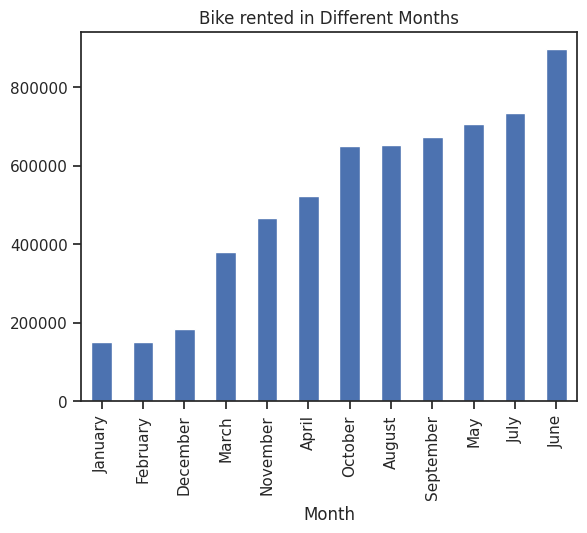

In [29]:
# month vs bike rented
bike_data.groupby('Month')['Rented Bike Count'].sum().sort_values(ascending =True).plot(kind = 'bar')
plt.title("Bike rented in Different Months")



In [30]:
numeric_features.columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

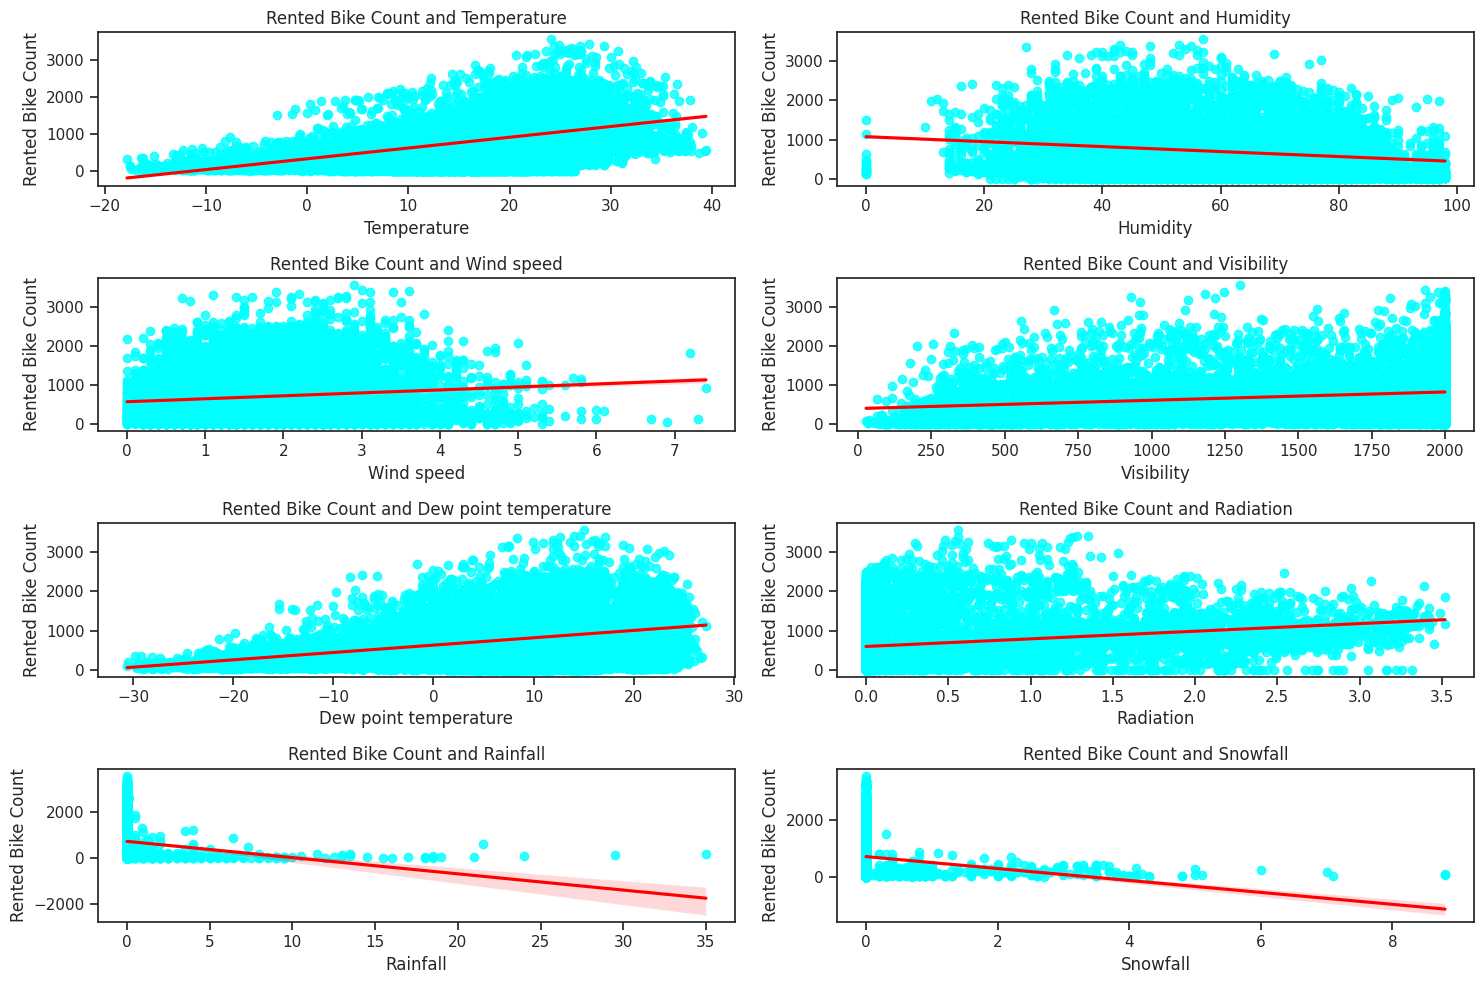

In [31]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns[1:]:
   plt.subplot(4,2,n)
   n+=1
   sns.regplot(x=bike_data[i], y=bike_data['Rented Bike Count'], scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
   plt.title(f'Rented Bike Count and {i}')
   plt.tight_layout()

In [ ]:
sns.pairplot(bike_data)
plt.figure(figsize=(20,8))

#Observation
From all these charts we made several conclusions :

###Season
In the season column, we are able to understand that the demand is low in the winter season and highest in summer

###Holiday
In the Holiday column, The demand is low during holidays, but during no holidays the demand is high, it may be because people use bikes to go to their work.

###Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

###Week
In the week column, We can observe from this column that the pattern of weekdays and weekends is different. In the weekend the demand becomes high in the afternoon as people loves to travel during this hour . While the demand during office timings is high in weekdays as they might use them to reach office and return home

###Month
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.It is high during July and June time as there might be vacations and people love to enjoy outings

###Rainfall and Snowfall
During snowfall and rainfall demand for bike decreases naturally.

#Feature Engineering

 Correlation Plot

<Axes: >

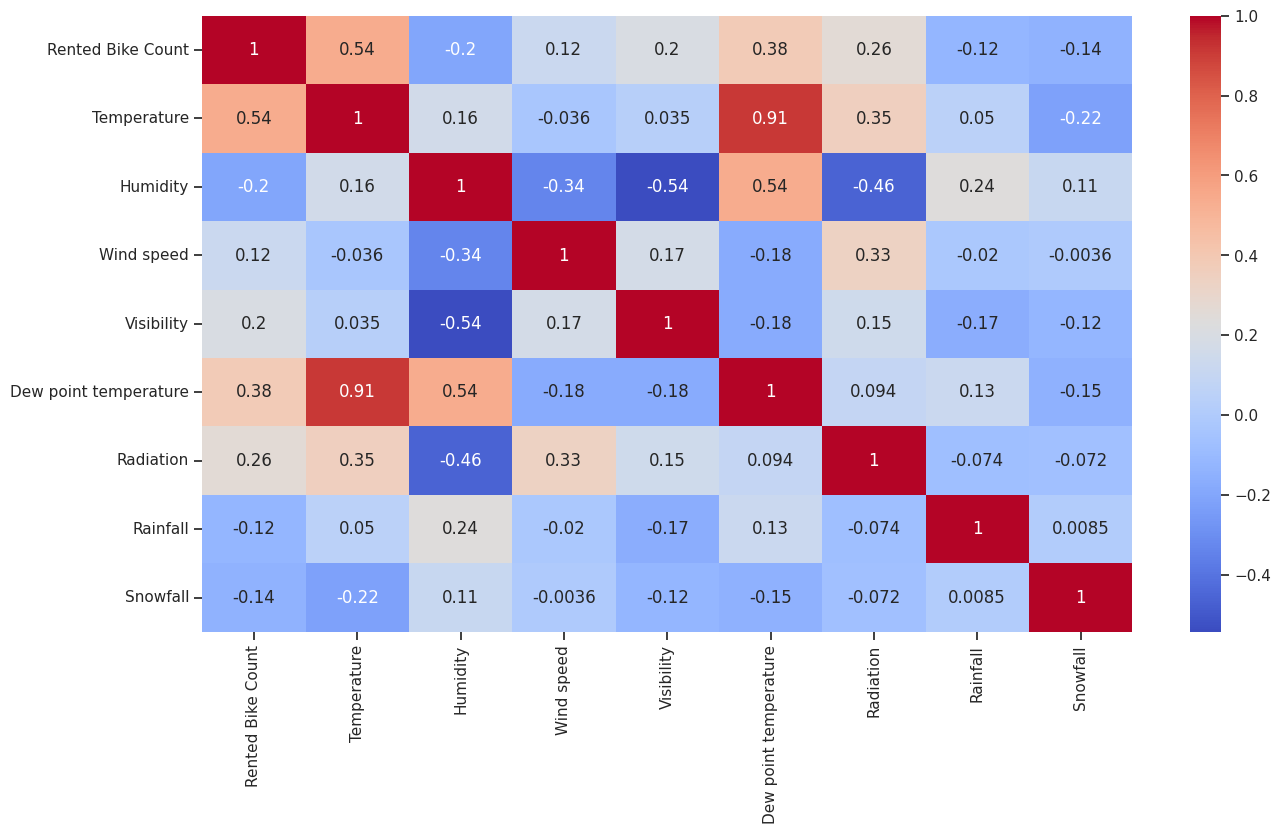

In [33]:
plt.figure(figsize=(15,8))
correlation = bike_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

From the correlation map it can be clearly seen temperature and dew point temperature are highly correlated . So we can drop dew point temperature column from the dataset We can also check variation inflation factor before dropping it

 Cramer's V


In [ ]:
!pip install association_metrics

In [ ]:
import association_metrics as am
data=bike_data.apply(lambda x : x.astype("category") if x.dtype=="O" else x)
cramers_v=am.CramersV(data)
cfit=cramers_v.fit().round(2)
cfit

Variance Inflation Factor

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count']]])

In [ ]:
# dew point column dropped based on VIF and Corr plot
bike_data.drop(columns = 'Dew point temperature',axis=1,inplace =True)

In [ ]:
calc_vif(bike_data[[i for i in bike_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

In [ ]:
numeric_features.drop('Dew point temperature',axis=1,inplace=True)

#Data Normalisation

In [41]:
var=list(bike_data.select_dtypes(include=['float64','int64']).columns)
var

['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Radiation',
 'Rainfall',
 'Snowfall']

# Skewness Distribution of Target Variable After  Transformation

Text(0.5, 1.0, 'Square root')

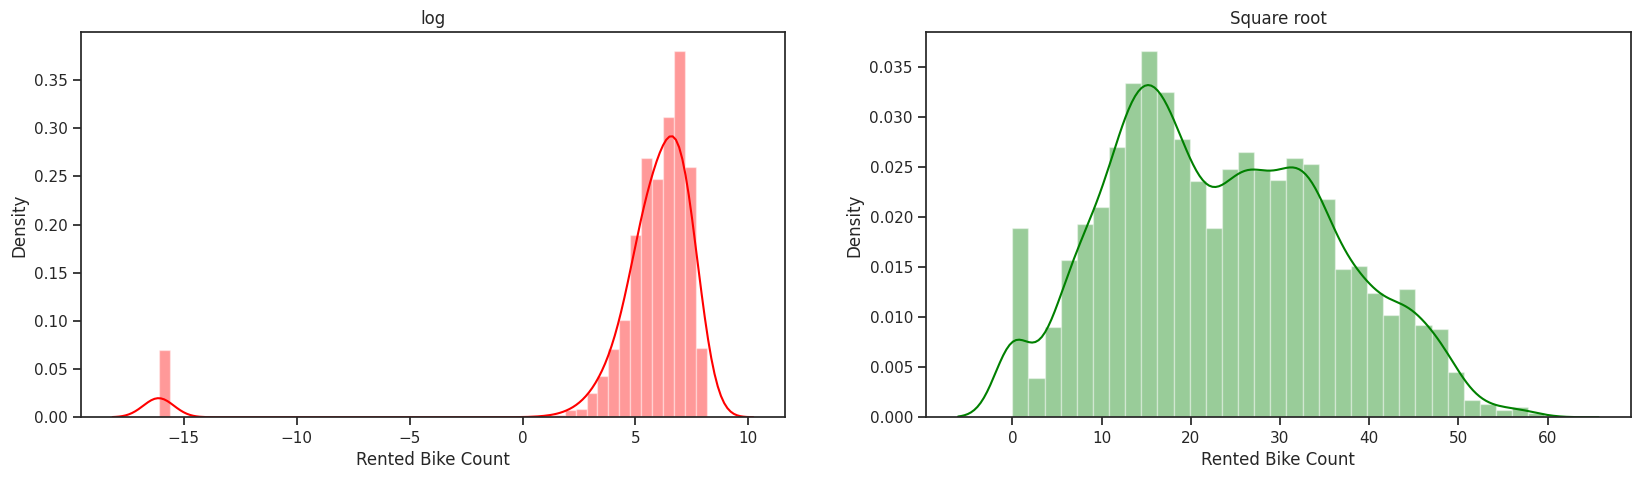

In [42]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.distplot(np.log(bike_data['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log")
sns.distplot(np.sqrt(bike_data['Rented Bike Count']),ax=axes[1], color='green').set_title("Square root")

In [43]:
bike_data['Rented Bike Count']=np.sqrt(bike_data['Rented Bike Count'])
bike_data['Rented Bike Count'].skew()

0.237362090985412

one_hot encoding

In [44]:
bike_data = pd.get_dummies(bike_data,drop_first=True)
bike_data

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,15.937377,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,14.282857,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,13.152946,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,10.344080,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.831761,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31.670175,4.2,34,2.6,1894,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8756,27.640550,3.4,37,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8757,26.343880,2.6,39,0.3,1968,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
8758,26.683328,2.1,41,1.0,1859,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0


Our Dataset is ready.

In [45]:
X = bike_data.drop(columns='Rented Bike Count')
Y = bike_data['Rented Bike Count']

# Model Building

# Train Test Split for Model

In [46]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [47]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=34)

In [48]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 47) (7008,)
(1752, 47) (1752,)


In [49]:
X_train

,Temperature,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
5401,25.4,85,1.4,1663,0.00,0.0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5004,24.1,73,2.2,992,2.15,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1113,1.9,65,0.8,402,0.06,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1654,-6.8,50,1.7,1856,0.00,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4014,18.9,98,0.3,338,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667,28.9,69,2.8,1871,0.00,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
324,-4.9,34,1.3,1768,0.60,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3157,15.6,38,4.7,1558,3.32,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5993,35.6,44,2.4,1860,1.69,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Feature Scaling

In [50]:

num_vars = ['Temperature','Humidity','Wind speed','Visibility','Radiation','Rainfall','Snowfall']


In [51]:
from sklearn.preprocessing import PowerTransformer

yeo = PowerTransformer()
X_train_scaled =yeo.fit_transform(X_train)# fit transform the training set
X_test_scaled = yeo.transform(X_test) #tranform the test set

In [52]:
X_train_scaled

array([[ 1.04297292,  1.29466233, -0.15744499, ..., -0.29755136,
        -0.30319787, -0.30655244],
       [ 0.93533911,  0.74247193,  0.61286874, ..., -0.29755136,
        -0.30319787, -0.30655244],
       [-0.91758878,  0.36486738, -0.93083382, ..., -0.29755136,
        -0.30319787, -0.30655244],
       ...,
       [ 0.22991796, -0.98483727,  2.14949259, ..., -0.29755136,
        -0.30319787, -0.30655244],
       [ 1.8856851 , -0.67258172,  0.7748095 , ..., -0.29755136,
        -0.30319787, -0.30655244],
       [ 0.92705713, -0.4184373 ,  0.15830858, ..., -0.29755136,
        -0.30319787, -0.30655244]])

# In this project we are using Six model on our data set for getting best performance:-
LINEAR REGRESSION

POLYNOMIAL REGRESSION

KNN  REGRESSION

DECISION TREE

RANDOM FORREST

GBM

# Linear Regression Model

In [53]:
#importing linear regression model

reg= LinearRegression().fit(X_train_scaled, y_train)

In [54]:
# predion on  train and test
y_pred_train=reg.predict(X_train_scaled)
y_pred_test=reg.predict(X_test_scaled)
accuracies = cross_val_score(estimator = reg, X = X_train_scaled, y = y_train, cv = 5)

In [55]:
# Evaluation Metric

def score_metrics(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    print('mean squared error is  :',mse)
    print('Root mean squared error is  :',np.sqrt(mse))

In [56]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train, y_pred_train)
print("R2 score is  :",r2_score(y_train, y_pred_train))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Cross Val Accuracy: {:.2f}".format(accuracies.mean()))

mean squared error is  : 28.942218009036278
Root mean squared error is  : 5.37979720891376
R2 score is  : 0.8112909691111917
Adjusted R2 : 0.8060859664986483
Cross Val Accuracy: 0.81


In [57]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test, y_pred_test)
print("R2 score is  :",r2_score(y_test, y_pred_test))
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


mean squared error is  : 30.9978755653287
Root mean squared error is  : 5.5675735796959795
R2 score is  : 0.8080318180161579
Adjusted R2 : 0.8027369209778711


RFE

In [58]:
from sklearn.feature_selection import RFE
# Create the RFE selector
selector = RFE(reg,n_features_to_select=15)  # Select top 15 features

# Apply feature selection on the normalized training data
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature indices
selected_feature_names = X_train.columns[selected_feature_indices]
print(selected_feature_names)
print(selected_feature_indices)

Index(['Temperature', 'Humidity', 'Rainfall', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_8', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Seasons_Winter', 'Functioning Day_Yes', 'Month_June'],
      dtype='object')
[ 0  1  5  9 10 11 14 24 25 26 27 28 32 34 41]


In [59]:
X_train_select_features = X_train[['Temperature', 'Humidity', 'Rainfall', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_8', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Seasons_Winter', 'Functioning Day_Yes', 'Month_June']]
X_test_select_features = X_test[['Temperature', 'Humidity', 'Rainfall', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_8', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Seasons_Winter', 'Functioning Day_Yes', 'Month_June']]


In [60]:
yeo = PowerTransformer()
X_train_select_scaled =yeo.fit_transform(X_train_select_features)# fit transform the training set
X_test_select_scaled = yeo.transform(X_test_select_features) #tranform the test set

In [61]:
# predion on  train and test
reg_select= LinearRegression().fit(X_train_select_features, y_train)
y_pred_train_select=reg_select.predict(X_train_select_features)
y_pred_test_select=reg_select.predict(X_test_select_features)
accuracies_select = cross_val_score(estimator = reg, X = X_train_select_scaled, y = y_train, cv = 5)

In [62]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test, y_pred_test_select)
print("R2 score is  :",r2_score(y_test, y_pred_test_select))
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_select))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

mean squared error is  : 46.61173688012483
Root mean squared error is  : 6.827278878156716
R2 score is  : 0.7113360117492978
Adjusted R2 : 0.7033740355475473


OLS

In [164]:
import statsmodels.api as sm
X_train_scaled_new = sm.add_constant(X_train_scaled_new)
lin_reg=sm.OLS(y_train,X_train_scaled_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     680.3
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:50:14   Log-Likelihood:                -21736.
No. Observations:                7008   AIC:                         4.356e+04
Df Residuals:                    6963   BIC:                         4.387e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5121      0.064    364.690      0.000      23.386      23.638
x1             4.9661      0.214     23.237      0.000       4.547       5.385
x2            -1.2551      0.114    -10.998      0.000      -1.479      -1.031
x3            -0.0229      0.077     -0.297      0.766      -0.174       0.128
x4             0.3866      0.097      4.005      0.000       0.197       0.576
x5             2.9227      0.197     14.822      0.000       2.536       3.309
x6            -2.9628      0.074    -40.213      0.000      -3.107      -2.818
x7             0.0030      0.073      0.041      0.967      -0.139       0.145
x8            -0.4585      0.088     -5.201      0.000      -0.631      -0.286
x9            -0.9932      0.089    -11.193      0.000      -1.167      -0.819
x10           -1.4926      0.090    -16.655      0.000      -1.668      -1.317
x11           -1.9616      0.088    -22.262      0.000      -2.134      -1.789
x12           -1.9700      0.090    -21.909      0.000      -2.146      -1.794
x13           -0.9314      0.089    -10.422      0.000      -1.107      -0.756
x14            0.0549      0.092      0.600      0.548      -0.124       0.234
x15            0.9780      0.096     10.140      0.000       0.789       1.167
x16           -0.4857      0.108     -4.493      0.000      -0.698      -0.274
x17           -1.4394      0.113    -12.686      0.000      -1.662      -1.217
x18           -1.4410      0.116    -12.414      0.000      -1.669      -1.213
x19           -1.2255      0.120    -10.223      0.000      -1.460      -0.991
x20           -1.2563      0.118    -10.626      0.000      -1.488      -1.025
x21           -1.2675      0.120    -10.585      0.000      -1.502      -1.033
x22           -0.9536      0.115     -8.286      0.000      -1.179      -0.728
x23           -0.6137      0.111     -5.515      0.000      -0.832      -0.396
x24            0.2831      0.105      2.691      0.007       0.077       0.489
x25            1.6335      0.095     17.162      0.000       1.447       1.820
x26            1.2539      0.090     13.858      0.000       1.077       1.431
x27            1.2804      0.090     14.239      0.000       1.104       1.457
x28            1.3233      0.089     14.915      0.000       1.149       1.497
x29            1.0444      0.088     11.817      0.000       0.871       1.218
x30            0.2910      0.090      3.243      0.001       0.115       0.467
x31           -0.1033      0.076     -1.366      0.172      -0.252       0.045
x32           -0.1475      0.067     -2.190      0.029      -0.280      -0.015
x33           -1.1350      0.075    -15.213      0.000      -1.281      -0.989
x34            0.6647      0.066     10.079      0.000       0.535       0.794
x35            5.2413      0.067     78.174      0.000       5.110       5.373
x3

In [95]:
# Checking for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
residual=y_test-y_pred_test
bp_test = het_breuschpagan(residual, np.column_stack((y_pred_test, np.square(y_pred_test))))
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 1.6335349699963812e-88


In [96]:
np.mean(residual)

-0.06294574836763964

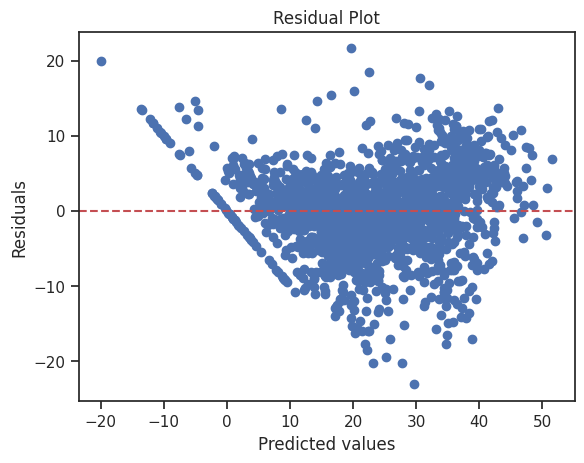

In [97]:

plt.scatter(y_pred_test, residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

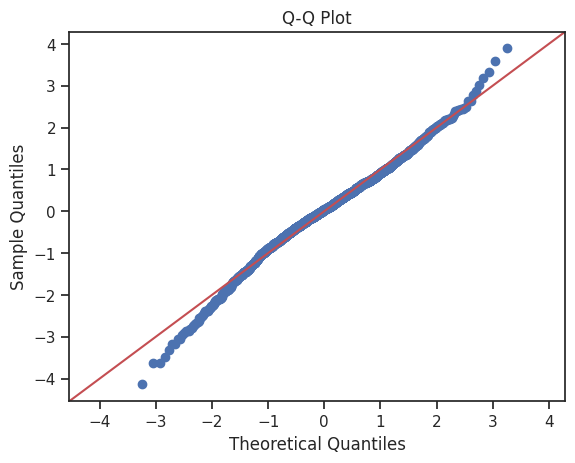

In [98]:
import statsmodels.api as sm
sm.qqplot(residual,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

In [99]:
X_test_scaled_new = sm.add_constant(X_test_scaled)
y_pred_ols = lin_reg.predict(X_test_scaled_new)

In [100]:
# MODEL EVALUATION ON TEST DATA
score_metrics(y_test, y_pred_ols)
print("R2 score is  :",r2_score(y_test, y_pred_ols))
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_ols))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

mean squared error is  : 30.99736065933352
Root mean squared error is  : 5.567527337996062
R2 score is  : 0.8080350068013886
Adjusted R2 : 0.8027401977166851


## POLYNOMIAL

In [101]:

poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [102]:
poly_reg = LinearRegression().fit(poly_X_train,y_train)


In [103]:
poly_pred_train = poly_reg.predict(poly_X_train)
poly_pred_test = poly_reg.predict(poly_X_test)


In [104]:
# MODEL EVALUATION ON TRAIN DATA
score_metrics(y_train,poly_pred_train)
print("R2 score is  :",r2_score(y_train, poly_pred_train ))
print("Adjusted R2 :",1-(1-r2_score(y_train, poly_pred_train ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

mean squared error is  : 11.090474460013953
Root mean squared error is  : 3.330236397016577
R2 score is  : 0.9276878956964224
Adjusted R2 : 0.9256933716927439


In [105]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,poly_pred_test)
print("R2 score is  :",r2_score(y_test, poly_pred_test))
print("Adjusted R2 :",1-(1-r2_score(y_test, poly_pred_test ))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


mean squared error is  : 17.290140023922056
Root mean squared error is  : 4.158141414613271
R2 score is  : 0.8929230895309845
Adjusted R2 : 0.8899696770943392


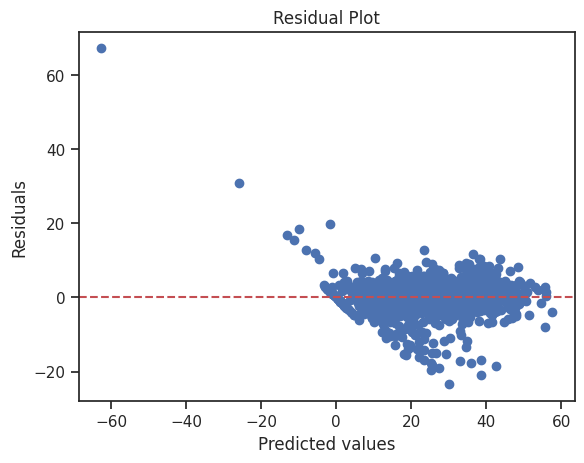

In [106]:
residual_poly=y_test-poly_pred_test
plt.scatter(poly_pred_test, residual_poly)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [107]:
# Checking for heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residual_poly, np.column_stack((poly_pred_test, np.square(poly_pred_test))))
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 1.914992992513357e-72


#KNN Regressor

In [125]:
# Create a KNN regressor
knn_regressor = KNeighborsRegressor()

k_val =np.arange(5,60)

# Define the grid of hyperparameters to search
param_grid = {'n_neighbors': k_val }

# Perform grid search with cross-validation to find the optimal K
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best K value and the corresponding model
best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_

# Predict on the test and train set using the best model
y_pred_knn_test = best_model.predict(X_test_scaled)



# Evaluate the model
mse = mean_squared_error(y_test, y_pred_knn_test)
print("Best K:", best_k)
print("Mean Squared Error:", mse)


Best K: 5
Mean Squared Error: 29.532816311974194


In [126]:
model = KNeighborsRegressor(n_neighbors =best_k )
model.fit(X_train_scaled, y_train)
y_pred_knn_train=model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled) #make prediction on test set


In [127]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test, y_pred_knn_test)

mean squared error is  : 29.532816311974194
Root mean squared error is  : 5.434410392303308


In [128]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train, y_pred_knn_train)

mean squared error is  : 16.586777429658472
Root mean squared error is  : 4.0726867581068


# Implementing Decision tree regressor

In [129]:
#importing the decision tree model for training
decision_regressor = DecisionTreeRegressor(max_depth=8)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [130]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [131]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_train_dt)
accuracies = cross_val_score(estimator = decision_regressor, X = X_train, y = y_train, cv = 5)
print('Cross validation accuracy :', np.mean(accuracies))

mean squared error is  : 35.820931714284235
Root mean squared error is  : 5.985059040166958
Cross validation accuracy : 0.7292442022829745


In [132]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_dt)

mean squared error is  : 44.60555877922207
Root mean squared error is  : 6.678739310620087


# Implementing Random forest Rergressor

In [133]:

rf_model=RandomForestRegressor(n_estimators=100,max_depth=12,random_state=42)
rf_model.fit(X_train,y_train)



RandomForestRegressor(max_depth=12, random_state=42)

In [134]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [135]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_train_rf)
accuracies = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 5)
print('Cross validation accuracy :', np.mean(accuracies))

mean squared error is  : 13.77541350986559
Root mean squared error is  : 3.711524418600205
Cross validation accuracy : 0.8724764577051312


In [136]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_rf)


mean squared error is  : 21.608876162186906
Root mean squared error is  : 4.648534840375718


In [109]:
# random forest important feature selection
rf_model.feature_importances_

array([3.34409645e-01, 1.56036854e-01, 4.86580080e-03, 6.22623287e-03,
       2.39850694e-02, 3.67807316e-02, 8.86907601e-04, 8.79102866e-04,
       1.10444134e-02, 2.53785564e-02, 3.30778568e-02, 3.04819903e-02,
       6.50749618e-03, 1.75618113e-03, 1.30418227e-02, 3.28571874e-04,
       4.04844965e-04, 7.45038346e-05, 4.46310882e-04, 6.43766222e-05,
       8.97668275e-05, 1.95951038e-04, 5.00236055e-04, 9.76663191e-03,
       3.39212915e-02, 1.75700787e-02, 1.39154525e-02, 1.30648648e-02,
       5.53806155e-03, 2.79361477e-03, 2.67506732e-03, 5.74692722e-04,
       1.01755935e-02, 2.00798684e-03, 1.74893835e-01, 1.13198745e-02,
       7.81936815e-04, 5.17724279e-04, 1.16186480e-04, 8.72875628e-05,
       2.05623612e-04, 1.62577093e-03, 2.28067289e-03, 6.64522598e-04,
       5.83643983e-03, 1.81099457e-03, 3.92571070e-04])

In [137]:
features=X.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

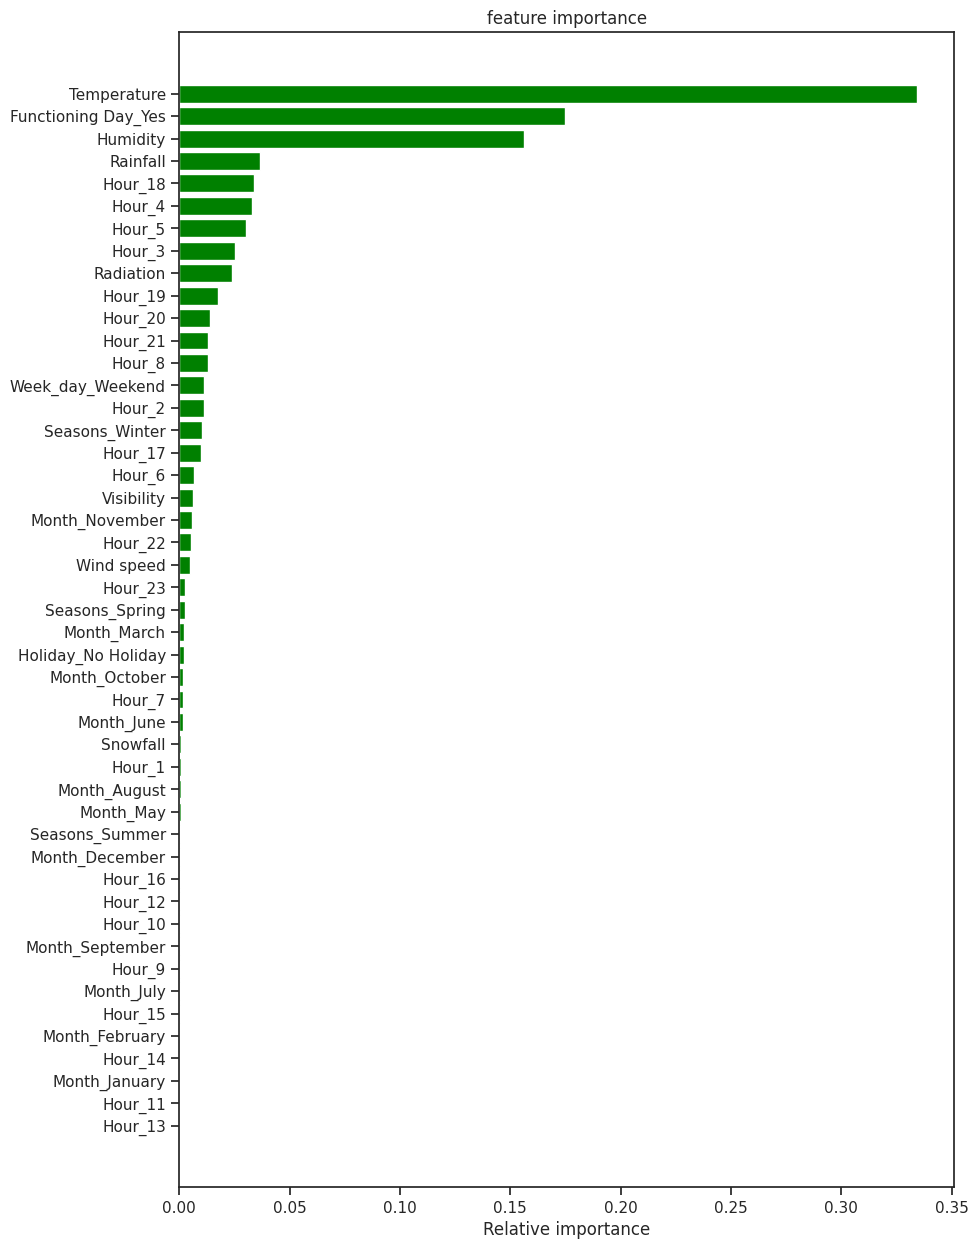

In [138]:
plt.figure(figsize=(10,15))
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

# Importing Random forest Regressor

In [139]:
pip install optuna

In [140]:
import optuna

def objective(trial):

    # Define the search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 50, 400),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 40, 300),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    # Create and train the model with the current hyperparameters
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

# Run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

# Print the best hyperparameters and loss
best_params = study.best_params
best_rmse = study.best_value
print('Best Parameters:', best_params)
print('Best Rmse:', best_rmse)

[I 2023-07-02 12:04:44,122] A new study created in memory with name: no-name-6520a33a-611d-4348-bd11-5370d37676be
[I 2023-07-02 12:04:47,075] Trial 0 finished with value: 9.068126910886846 and parameters: {'n_estimators': 250, 'max_depth': 9, 'min_samples_split': 63, 'min_samples_leaf': 206, 'max_features': 'auto'}. Best is trial 0 with value: 9.068126910886846.
[I 2023-07-02 12:04:49,545] Trial 1 finished with value: 8.509572331730235 and parameters: {'n_estimators': 450, 'max_depth': 13, 'min_samples_split': 278, 'min_samples_leaf': 109, 'max_features': 'log2'}. Best is trial 1 with value: 8.509572331730235.
[I 2023-07-02 12:04:50,221] Trial 2 finished with value: 9.640557533896086 and parameters: {'n_estimators': 200, 'max_depth': 13, 'min_samples_split': 256, 'min_samples_leaf': 156, 'max_features': 'log2'}. Best is trial 1 with value: 8.509572331730235.
[I 2023-07-02 12:04:56,698] Trial 3 finished with value: 8.341784819208742 and parameters: {'n_estimators': 400, 'max_depth': 11,

Best Parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 69, 'min_samples_leaf': 40, 'max_features': 'auto'}
Best Rmse: 5.222702095787626


## Training Random forest Regressor from GridesearchCV

In [114]:
# number of trees
n_estimators=[50,80,100]

#max depth of tree
max_depth=[4,6,8,10]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50,80,100]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [115]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   4.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.6s
[CV] END max_depth=4, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50, 80, 100],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [116]:
rf_optimal_model = rf_grid.best_estimator_

In [117]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [118]:
# MODEL EVALUATION ON TEST DATA

score_metrics(y_test,y_pred_test_r_g)


mean squared error is  : 31.70423305418022
Root mean squared error is  : 5.630651210488909


##Gradient Boosting Machine

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters
n_estimators = 500
learning_rate = 0.05
max_depth = 10
min_samples_split = 50
min_samples_leaf = 59

gbm = GradientBoostingRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf
)

gbm.fit(X_train, y_train)
y_pred_gbm_test = gbm.predict(X_test)
y_pred_gbm_train = gbm.predict(X_train)


In [120]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_train,y_pred_gbm_train)


mean squared error is  : 4.498886171304351
Root mean squared error is  : 2.1210577953710623


In [121]:
# MODEL EVALUATION ON TRAIN DATA

score_metrics(y_test,y_pred_gbm_test)

mean squared error is  : 9.449484223906811
Root mean squared error is  : 3.074001337655339


In [122]:
# Define the objective function for optimization
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 50,100),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'random_state': 42
    }



    # Create the GBM model with the current set of hyperparameters
    gbm = GradientBoostingRegressor(**params)

    # Train the model
    gbm.fit(X_train, y_train)

    # Evaluate the model on the validation set using mean squared error
    y_pred = gbm.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse=mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150)

# Print the best hyperparameters and best objective value
print("Best Hyperparameters:", study.best_params)
print("Best Objective Value (RMSE):", np.sqrt(study.best_value))
print("Best Objective Value (MSE):", study.best_value)


[I 2023-07-02 11:18:05,536] A new study created in memory with name: no-name-250c7bdb-0132-410e-9eea-87621bb11638
[I 2023-07-02 11:18:17,413] Trial 0 finished with value: 47.558056065371936 and parameters: {'n_estimators': 773, 'learning_rate': 0.0027862499012697925, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 98, 'subsample': 0.8440190499124776, 'max_features': 'auto'}. Best is trial 0 with value: 47.558056065371936.
[I 2023-07-02 11:18:19,795] Trial 1 finished with value: 38.03704066745201 and parameters: {'n_estimators': 934, 'learning_rate': 0.006910297673063044, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 99, 'subsample': 0.9101019974557452, 'max_features': 'log2'}. Best is trial 1 with value: 38.03704066745201.
[I 2023-07-02 11:18:21,568] Trial 2 finished with value: 32.12603017019343 and parameters: {'n_estimators': 552, 'learning_rate': 0.010231339562254822, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 62, 'subsample': 0.8029536158

Best Hyperparameters: {'n_estimators': 818, 'learning_rate': 0.038416087450126486, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 53, 'subsample': 0.9494768155414364, 'max_features': 'auto'}
Best Objective Value (RMSE): 3.0043543628304623
Best Objective Value (MSE): 9.026145137458434


# Model Summary for the train data set

In [123]:
from prettytable import PrettyTable
train = PrettyTable(['S.NO',"MODEL_NAME", "MSE", "RMSE",])
train.add_row(['1','Linear Regression','28.94','5.37'])
train.add_row(['2','Polyomial Regression','11.09','3.33'])
train.add_row(['3','KNN Regression','16.5','4.07'])
train.add_row(['4','Decision Tree regressor','35.82','5.98'])
train.add_row(['5','Random forest regressor','13.77','3.71'])
train.add_row(['6','GBM','4.49','2.212'])
print(train)

+------+-------------------------+-------+-------+
| S.NO |        MODEL_NAME       |  MSE  |  RMSE |
+------+-------------------------+-------+-------+
|  1   |    Linear Regression    | 28.94 |  5.37 |
|  2   |   Polyomial Regression  | 11.09 |  3.33 |
|  3   |      KNN Regression     |  16.5 |  4.07 |
|  4   | Decision Tree regressor | 35.82 |  5.98 |
|  5   | Random forest regressor | 13.77 |  3.71 |
|  6   |           GBM           |  4.49 | 2.212 |
+------+-------------------------+-------+-------+


# Model Summary for the test data set

In [124]:
from prettytable import PrettyTable
test = PrettyTable(['S.NO',"MODEL_NAME", "MSE", "RMSE"])
test.add_row(['1','Linear Regression','30.99','5.56'])
test.add_row(['2','Polynomial Regression','17.29','4.15'])
test.add_row(['3','kNN regressor','29.53','5.43'])
test.add_row(['4','Decision Tree regressor','44.39','6.66'])
test.add_row(['5','Random forest regressor','21.6','4.64'])
test.add_row(['6','GBM','8.98','2.99'])
print(test)

+------+-------------------------+-------+------+
| S.NO |        MODEL_NAME       |  MSE  | RMSE |
+------+-------------------------+-------+------+
|  1   |    Linear Regression    | 30.99 | 5.56 |
|  2   |  Polynomial Regression  | 17.29 | 4.15 |
|  3   |      kNN regressor      | 29.53 | 5.43 |
|  4   | Decision Tree regressor | 44.39 | 6.66 |
|  5   | Random forest regressor |  21.6 | 4.64 |
|  6   |           GBM           |  8.98 | 2.99 |
+------+-------------------------+-------+------+


# Conclusion:

On the basis of model evaluation metrics GBM is giving best results with the rmse followed by Polynomial Regression and Random Forest.
